In [2]:
concept_dict = {}
with open('concept_data/322topics_final.tsv', 'r') as f:
    for line in f:
        key, value = line.strip().split('|')
        concept_dict[int(key)] = value

print(concept_dict[123])
print(len(concept_dict))

random forest
322


In [3]:
import os

documents_dict = {}
file_list = [f for f in os.listdir('./document_data/lecturebank_combined') if f.endswith('.txt')]

for file_name in file_list:
    with open(f'./document_data/lecturebank_combined/{file_name}', 'r', encoding='utf-8') as file:
        content = file.read()
        
    documents_dict[int(file_name[:-4])] = content

print(documents_dict[123])
print(len(documents_dict))

introduction to nlp , combinatory categorial , grammar ccg , combinatory categorial , grammar ccg , complex types , e gx y and x y , these take an argument of type y and return an object of type , x ymeans that y should appear on the right , x ymeans that y should appear on the left , structure of ccg , combinatory rules , ccg rules , function composition , x yy zx z , x yz xz y , x yy zx z , x yz xz y , type raising , xy y x , xy y x , example from jonathan kummerfeld aleka blackwell and patrick littell , expressive power , ccgs can generate the language anbncndn n 0 , interesting examples , i like new york , i like and hate new york , i like and would rather be in new york , i gave a book to chen and a laptop to jorge , i want chen to stay and jorge to leave , i like and chen hates new york , where are the verb phrases , examples from steedman 1996 , examples from steedman 1996 , examples from steedman 1996 , ccg in nltk , from nltk ccg import chart lexicon , lexlexicon parselexicon'

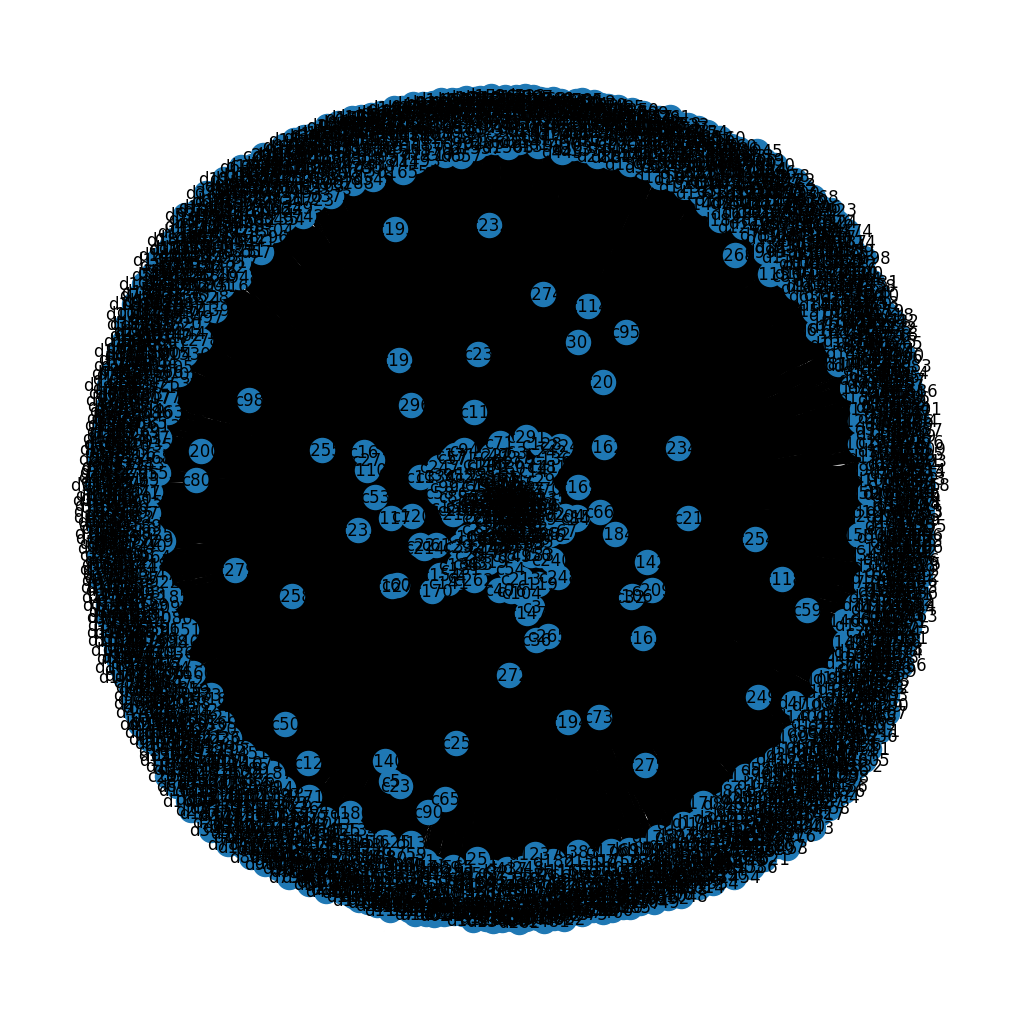

In [11]:
import networkx as nx
from thefuzz import fuzz
import matplotlib.pyplot as plt
import pickle

G = nx.DiGraph()

for doc_id, document in documents_dict.items():
    G.add_node(f'd{doc_id}', type='doc', text=document)

for concept_id, concept in concept_dict.items():
    G.add_node(f'c{concept_id}',type='concept', text=concept)

for doc_id, document in documents_dict.items():
    for concept_id, concept in concept_dict.items():
        score = fuzz.partial_ratio(concept, document)
        if score > 90:
            G.add_edge(f'c{concept_id}', f'd{doc_id}')

plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)
plt.show()

with open('save/graph.pkl', 'wb') as f:
    pickle.dump(G, f)

# with open('graph.pkl', 'rb') as f:
#     G = pickle.load(f)


In [15]:
import networkx as nx
from thefuzz import fuzz
import matplotlib.pyplot as plt
import pickle

with open('save/graph.pkl', 'rb') as f:
    G = pickle.load(f)

concept_count = sum(1 for _, data in G.nodes(data=True) if data.get('type') == 'concept')
print(concept_count)



for node, data in G.nodes(data=True):
    if data['type'] == 'concept':
        print(node)
        print(data['text'])
        break

concept_id = 123
print(G.nodes[f'c{concept_id}']['text'])
for neigh_doc in G.neighbors(f'c{concept_id}'):
    print(neigh_doc)
    print(G.nodes[neigh_doc]['text'])



322
c1
spelling correction
random forest
d1682
lecture 07 , ensemble methods , stat 479machine learning fall 2018 , sebastian raschka , httpstat wisc edusraschka teaching stat479 fs2018 , sebastian raschkastat 479machine learningfs 2018 , ensemble methods , majority voting , random forests , sebastian raschkastat 479machine learningfs 2018 , majority voting , sebastian raschkastat 479machine learningfs 2018 , sebastian raschkastat 479machine learningfs 2018 , majority vote classier , training set , classification , final prediction , yfmode h1x h2xhnx , sebastian raschkastat 479machine learningfs 2018 , why majority vote , assume n independent classiers with a base error rate , here independent means that the errors are uncorrelated , assume a binary classication task , assume the error rate is better than random guessing i e , lower than 0 5 for binary classication , i12ni0 5 , sebastian raschkastat 479machine learningfs 2018 , why majority vote , assume n independent classiers with a

In [8]:
concept_id = 123

print(G.nodes[f'c{concept_id}']['text'])
connected_documents = G.neighbors(f'c{concept_id}')

for doc in connected_documents:
    print(doc.text)


KeyError: 'text'